In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
path_to_connect_classy = '/home/jthybo/connect_wsl/mcmc_plugin/python/build/lib.connect_disguised_as_classy'
sys.path.insert(1, path_to_connect_classy)
from classy import Class
cosmo_model = Class()
cosmo_model.set({'connect_model': 'DRMD_desi_iter',
           'H0'           : 67.7,
              'omega_b'     : 0.022,
                'omega_cdm'   : 0.12,
                'A_s'         : 2.1e-9,
                'n_s'         : 0.965,
                'tau_reio'    : 0.06,
                'delta_Neff_drmd': 0.7,
                'f_idm_drmd': 0.012,
                'log10z_stop': 4.6,
                'log10G_eff_ncdm_interacting': 9
          })
cosmo_model.compute()

z_values = np.linspace(0, 5, 100)
luminosity_distances_model = [cosmo_model.luminosity_distance(z) for z in z_values]


2026-01-13 09:34:44.179977: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-13 09:34:44.211200: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-13 09:34:44.542112: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-13 09:34:44.544593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-13 09:34:45.833834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [7]:
from classy_NEDE import Class

parameters = {
    'output': 'tCl lCl, mPk, pCl',
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'h': 0.67,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.06,
    'modes': 's, t',
    'delta_Neff_drmd': 1,
    'f_idm_drmd': 0.08,
    'log10z_stop': 4.6,
}
cosmo_lcdm = Class()
cosmo_lcdm.set(parameters)
cosmo_lcdm.compute()

z_values = np.linspace(0, 5, 100)
luminosity_distances_lcdm = [cosmo_lcdm.luminosity_distance(z) for z in z_values]

In [8]:
H0_lcdm = cosmo_lcdm.h() * 100      # km/s/Mpc
H0_model = cosmo_model.get_current_derived_parameters(['H0'])['H0']  # km/s/Mpc
c = 299792.458                  # km/s

print(f"H0 LCDM: {H0_lcdm}, H0 model: {H0_model}")

y_lcdm = [H0_lcdm * dL / c for dL in luminosity_distances_lcdm]
y_model = [H0_model * dL / c for dL in luminosity_distances_model]  # if same H0

H0 LCDM: 67.0, H0 model: 67.69025421142578


/home/jthybo/connect_wsl/mcmc_plugin/python/build/lib.connect_disguised_as_classy/classy.py:190: UserWarning: The parameter log10_G_over_aH_drmd is not listed with a default value, so a value of 0.0 is used instead. You can add a default value to the load_model method in the file: /home/jthybo/connect_wsl/mcmc_plugin/python/build/lib.connect_disguised_as_classy/classy.py
  warnings.warn(f'The parameter {par_name} is not listed with a default value, so a value of 0.0 is used instead. You can add a default value to the load_model method in the file: {os.path.join(CONNECT_PATH,__file__)}')


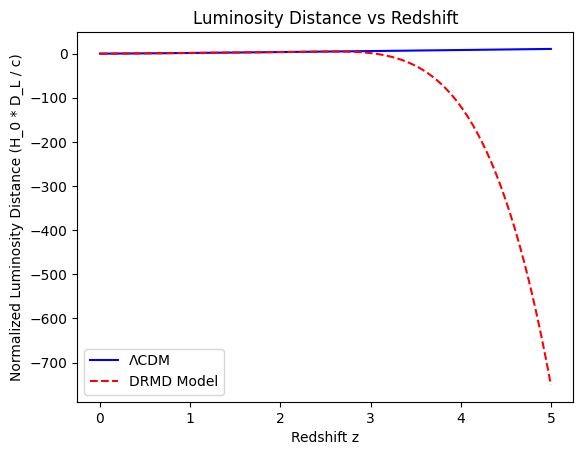

In [9]:
z_values = np.linspace(0, 5, 100)
plt.plot(z_values, y_lcdm, label='ΛCDM', color='blue')
plt.plot(z_values, y_model, label='DRMD Model', color='red', linestyle='--')
plt.xlabel('Redshift z')
plt.yscale('linear')
plt.ylabel('Normalized Luminosity Distance (H_0 * D_L / c)')
plt.title('Luminosity Distance vs Redshift')
plt.legend()

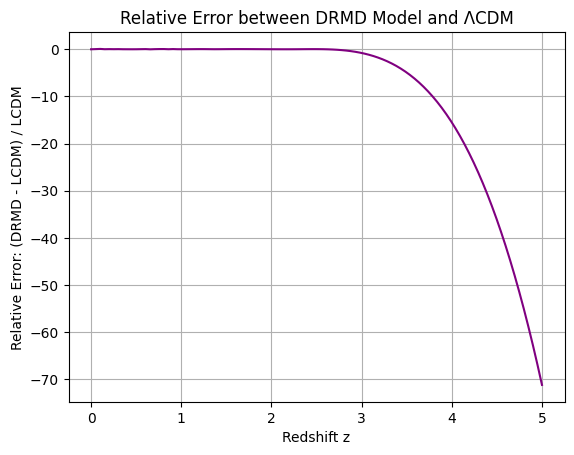

In [10]:
relative_error = [(ym - yl) / yl if yl != 0 else 0 for yl, ym in zip(y_lcdm, y_model)]
plt.plot(z_values, relative_error, color='purple')
plt.xlabel('Redshift z')
plt.ylabel('Relative Error: (DRMD - LCDM) / LCDM')
plt.title('Relative Error between DRMD Model and ΛCDM')
plt.grid(True)
plt.show()

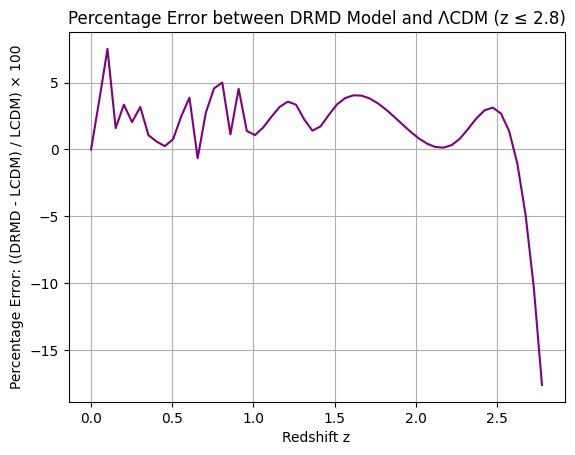

In [13]:
percent_error = 100 * np.array(relative_error)
plt.plot(z_values[mask], percent_error[mask], color='purple')
plt.xlabel('Redshift z')
plt.ylabel('Percentage Error: ((DRMD - LCDM) / LCDM) × 100')
plt.title('Percentage Error between DRMD Model and ΛCDM (z ≤ 2.8)')
plt.grid(True)
plt.show()